# Project 1 - Locations of charging stations for battery electric vehicles.

## Introduction to the project

### Objective

The goal of the modeling is to find out at which location a charging station should be built and of what type it should be. 

In **task 1**, the goal is to find the location while minimizing the investment costs. 

In **task 2** the investment costs should still remain minimal. Furthermore, the Euclidean distance between the district and the location of the charging station, where the citizens of the district charge their vehicles, should not exceed 2 km. 

In **task 3**, locations for charging stations are to be selected in such a way that a maximum of €1.8 million in investment costs is not exceeded. Here, too, the maximum distance between the district and the charging station serving the district should not exceed 2 km. 

### Data set

The dataset consists of two csv files: 

* 'ladestationen.csv':<br />
    Contains the numbers and coordinates of possible locations for
    charging stations.

* 'stadtteile.csv':<br />
    Contains the coordinates as well as the demand from the districts.


## Mathematical Modeling

Every model consists of five essential parts. 

1. The *index set* is introduced to ensure consistent numbering of parameters and decision variables. It's the same for every task.
2. The *parameters* control the operation of the Gurobi solvers. They must be modified before the optimization begins.
3. The *decision variables* are the variables we're interested in. The aim of the optimization is to get values for the decision variables so the objective function is minimized / maximized.
4. The *objective function* is the function which has to be minimized or maximized.
5. The *constraints* limit the possible solution set of the objective function to get appropriate values for the decision variables according to the framework. 

In the following, the model consisting of these five parts can be viewed for each of the tasks. The index set is not subject to change here.

### Task 1

#### Index sets

$dis\_idx \in DIS\_IDX$: Index and set of districts.

$cs\_idx\_s \in CS\_IDX\_S = [0,49]$: Index and set of charging stations of type 'small'.

$cs\_idx\_m \in CS\_IDX\_M = [50,99]$: Index and set of charging stations of type 'medium'.

$cs\_idx\_l \in CS\_IDX\_L = [100,149]$: Index and set of charging stations of type 'large'.

$cs\_idx \in CS\_IDX = CS\_IDX\_S \cup CS\_IDX\_M \cup CS\_IDX\_L$: Index and set of all charging stations.




$\quad \forall cs\_idx \in CS\_IDX$: Type of $cs\_idx$ = $cs\_idx$ // 50 (0:'small', 1:'medium', 2:'large')

$\quad \forall cs\_idx \in CS\_IDX$: Position of $cs\_idx$ = $cs\_idx$ % 50.



#### Parameters

$dis\_demand_{dis\_idx} \in \mathbb{R}^+$: Demand for chargers in district $dis\_idx$.

$\text{costS} = 100000$: Cost of building a charging station of the type $cs\_idx\_s$.

$\text{costM} = 170000$: Cost of building a charging station of the type $cs\_idx\_m$.

$\text{costL} = 200000$: Cost of building a charging station of the type $cs\_idx\_l$.

$capS= 10$: Number of chargers of charging stations of type $cs\_idx\_s$.
 
$capM = 30$: Number of chargers of charging stations of type $cs\_idx\_m$.

$capL = 40$: Number of chargers of charging stations of type $cs\_idx\_l$.

$x_{cs\_idx,dis\_idx} \in \mathbb{R}^+$: Amount of the district's $dis\_idx$ demand met by charging station $cs\_idx$. 

#### Decision variables

$ys_{cs\_idx\_s} \in \{0, 1 \}$: This variable equals 1 if a charging station of type $cs\_idx\_s$ is built at position of $cs\_idx\_s$; otherwise 0.

$ym_{cs\_idx\_m} \in \{0, 1 \}$: This variable equals 1 if a charging station of type $cs\_idx\_m$ is built at position of $cs\_idx\_m$; otherwise 0.

$yl_{cs\_idx\_l} \in \{0, 1 \}$: This variable equals 1 if a charging station of type $cs\_idx\_l$ is built at position of $cs\_idx\_l$; otherwise 0.


#### Objective function

- **Costs**. Minimize investment costs.
 

\begin{equation}
\text{Min} \quad Z = 
\text{costS}* \sum_{cs\_idx\_s \in CS\_IDX\_S} ys_{cs\_idx\_s} + \text{costM}* \sum_{cs\_idx\_m \in CS\_IDX\_M} ym_{cs\_idx\_m} + \text{costL}* \sum_{cs\_idx\_l \in CS\_IDX\_L} yl_{cs\_idx\_l}  
\tag{0}
\end{equation}

#### Constraints

- **Demand**. The complete demand of a district $dis\_idx$ should be met.

\begin{equation}
\sum_{cs\_idx  \in  CS\_IDX} x_{cs\_idx,dis\_idx} = dis\_demand_{dis\_idx} \quad \forall dis\_idx \in DIS\_IDX
\tag{1}
\end{equation}

- **Capacity**. Capacity of a charging station $cs\_idx$ (number of chargers) cannot be exceeded. 
\begin{equation}
\sum_{dis\_idx \in DIS\_IDX} x_{cs\_idx,dis\_idx} \leq ys_{cs\_idx}*capS + ym_{cs\_idx}*capM + yl_{cs\_idx}*capL  \quad \forall cs\_idx \in CS\_IDX
\tag{2}
\end{equation}

- **Location**. At every possible location $cs\_idx$ a maximum of one charging station can be built. 

\begin{equation}
ys_{cs\_idx} + ym_{cs\_idx} + yl_{cs\_idx} \leq 1 \quad \forall cs\_idx \in CS\_IDX
\tag{3}
\end{equation}

### Task 2

#### Index sets

$dis\_idx \in DIS\_IDX$: Index and set of districts.

$cs\_idx\_s \in CS\_IDX\_S = [0,49]$: Index and set of charging stations of type 'small'.

$cs\_idx\_m \in CS\_IDX\_M = [50,99]$: Index and set of charging stations of type 'medium'.

$cs\_idx\_l \in CS\_IDX\_L = [100,149]$: Index and set of charging stations of type 'large'.

$cs\_idx \in CS\_IDX = CS\_IDX\_S \cup CS\_IDX\_M \cup CS\_IDX\_L$: Index and set of all charging stations.




$\quad \forall cs\_idx \in CS\_IDX$: Type of $cs\_idx$ = $cs\_idx$ // 50 (0:'small', 1:'medium', 2:'large')

$\quad \forall cs\_idx \in CS\_IDX$: Position of $cs\_idx$ = $cs\_idx$ % 50.



#### Parameters

$bigM = 40$: Usage of bigM formulation for radius constraints.

$radius = 2$: Maximum Euclidean distance between a district $dis\_idx$ and a charging station $cs\_idx$ serving the district.

$dist\_dict_{cs\_idx,dis\_idx} \in \mathbb{R}^+$: Euclidean distance between district $dis\_idx$ and charging station $cs\_idx$.

$dis\_demand_{dis\_idx} \in \mathbb{R}^+$: Demand for chargers in district $dis\_idx$.

$\text{costS} = 100000$: Cost of building a charging station of the type $cs\_idx\_s$.

$\text{costM} = 170000$: Cost of building a charging station of the type $cs\_idx\_m$.

$\text{costL} = 200000$: Cost of building a charging station of the type $cs\_idx\_l$.

$capS= 10$: Number of chargers of charging stations of type $cs\_idx\_s$.
 
$capM = 30$: Number of chargers of charging stations of type $cs\_idx\_m$.

$capL = 40$: Number of chargers of charging stations of type $cs\_idx\_l$.

$x_{cs\_idx,dis\_idx} \in \mathbb{R}^+$: Amount of the district's $dis\_idx$ demand met by charging station $cs\_idx$. 


#### Decision variables

$ys_{cs\_idx\_s} \in \{0, 1 \}$: This variable equals 1 if a charging station of type $cs\_idx\_s$ is built at position of $cs\_idx\_s$; otherwise 0.

$ym_{cs\_idx\_m} \in \{0, 1 \}$: This variable equals 1 if a charging station of type $cs\_idx\_m$ is built at position of $cs\_idx\_m$; otherwise 0.

$yl_{cs\_idx\_l} \in \{0, 1 \}$: This variable equals 1 if a charging station of type $cs\_idx\_l$ is built at position of $cs\_idx\_l$; otherwise 0.

#### Objective function

- **Costs**. Minimize investment costs.
 

\begin{equation}
\text{Min} \quad Z = 
\text{costS}* \sum_{cs\_idx\_s \in CS\_IDX\_S} ys_{cs\_idx\_s} + \text{costM}* \sum_{cs\_idx\_m \in CS\_IDX\_M} ym_{cs\_idx\_m} + \text{costL}* \sum_{cs\_idx\_l \in CS\_IDX\_L} yl_{cs\_idx\_l}  
\tag{0}
\end{equation}

#### Constraints

- **Demand**. The complete demand of a district $dis\_idx$ should be met.

\begin{equation}
\sum_{cs\_idx  \in  CS\_IDX} x_{cs\_idx,dis\_idx} = dis\_demand_{dis\_idx} \quad \forall dis\_idx \in DIS\_IDX
\tag{1}
\end{equation}

- **Capacity**. Capacity of a charging station $cs\_idx$ (number of chargers) cannot be exceeded. 
\begin{equation}
\sum_{dis\_idx \in DIS\_IDX} x_{cs\_idx,dis\_idx} \leq ys_{cs\_idx}*capS + ym_{cs\_idx}*capM + yl_{cs\_idx}*capL  \quad \forall cs\_idx \in CS\_IDX
\tag{2}
\end{equation}

- **Location**. At every possible location $cs\_idx$ a maximum of one charging station can be built. 

\begin{equation}
ys_{cs\_idx} + ym_{cs\_idx} + yl_{cs\_idx} \leq 1 \quad \forall cs\_idx \in CS\_IDX
\tag{3}
\end{equation}

- **Radius**. The distance between a district $dis\_idx$ and a charging station $cs\_idx$ serving the district should not exceed the radius.

\begin{equation}
x_{cs\_idx,dis\_idx} \leq bigM*(dist\_dict[(cs\_idx, dis\_idx)] \leq 2) \quad \forall cs\_idx, dis\_idx \in CS\_IDX, DIS\_IDX
\tag{4}
\end{equation}

### Task 3

#### Index sets


$dis\_idx \in DIS\_IDX$: Index and set of districts.

$cs\_idx\_s \in CS\_IDX\_S = [0,49]$: Index and set of charging stations of type 'small'.

$cs\_idx\_m \in CS\_IDX\_M = [50,99]$: Index and set of charging stations of type 'medium'.

$cs\_idx\_l \in CS\_IDX\_L = [100,149]$: Index and set of charging stations of type 'large'.

$cs\_idx \in CS\_IDX = CS\_IDX\_S \cup CS\_IDX\_M \cup CS\_IDX\_L$: Index and set of all charging stations.




$\quad \forall cs\_idx \in CS\_IDX$: Type of $cs\_idx$ = $cs\_idx$ // 50 (0:'small', 1:'medium', 2:'large')

$\quad \forall cs\_idx \in CS\_IDX$: Position of $cs\_idx$ = $cs\_idx$ % 50.



#### Parameters

$bigM = 40$: Usage of bigM formulation for radius constraints. 

$budget = 1800000$: Maximum investment costs.

$ys_{cs\_idx\_s} \in \{0, 1 \}$: This variable equals 1 if a charging station of type $cs\_idx\_s$ is built at position of $cs\_idx\_s$; otherwise 0.

$ym_{cs\_idx\_m} \in \{0, 1 \}$: This variable equals 1 if a charging station of type $cs\_idx\_m$ is built at position of $cs\_idx\_m$; otherwise 0.

$yl_{cs\_idx\_l} \in \{0, 1 \}$: This variable equals 1 if a charging station of type $cs\_idx\_l$ is built at position of $cs\_idx\_l$; otherwise 0.

$radius = 2$: Maximum Euclidean distance between a district $dis\_idx$ and a charging station $cs\_idx$ serving the district.

$dist\_dict_{cs\_idx,dis\_idx} \in \mathbb{R}^+$: Euclidean distance between district $dis\_idx$ and charging station $cs\_idx$.

$\text{costS} = 100000$: Cost of building a charging station of the type $cs\_idx\_s$.

$\text{costM} = 170000$: Cost of building a charging station of the type $cs\_idx\_m$.

$\text{costL} = 200000$: Cost of building a charging station of the type $cs\_idx\_l$.

$capS= 10$: Number of chargers of charging stations of type $cs\_idx\_s$.
 
$capM = 30$: Number of chargers of charging stations of type $cs\_idx\_m$.

$capL = 40$: Number of chargers of charging stations of type $cs\_idx\_l$.

#### Decision variables

$dis\_demand_{dis\_idx} \in \mathbb{R}^+$: Demand for chargers in district $dis\_idx$.

$x_{cs\_idx,dis\_idx} \in \mathbb{R}^+$: Amount of the district's $dis\_idx$ demand met by charging station $cs\_idx$. 

#### Objective function

- **Demand**. Maximize the coverage of the demand by the charging stations.
 

\begin{equation}
\text{Min} \quad W = \sum_{dis\_idx  \in  DIS\_IDX} dis\_demand_{dis\_idx}  -  \sum_{cs\_idx \in CS\_IDX} \sum_{dis\_idx \in DIS\_IDX} x_{cs\_idx,dis\_idx} 
\tag{5}
\end{equation}

#### Constraints

- **Capacity**. Capacity of a charging station $cs\_idx$ (number of chargers) cannot be exceeded. 
\begin{equation}
\sum_{dis\_idx \in DIS\_IDX} x_{cs\_idx,dis\_idx} \leq ys_{cs\_idx}*capS + ym_{cs\_idx}*capM + yl_{cs\_idx}*capL  \quad \forall cs\_idx \in CS\_IDX
\tag{2}
\end{equation}

- **Location**. At every possible location $cs\_idx$ a maximum of one charging station can be built. 

\begin{equation}
ys_{cs\_idx} + ym_{cs\_idx} + yl_{cs\_idx} \leq 1 \quad \forall cs\_idx \in CS\_IDX
\tag{3}
\end{equation}

- **Radius**. The distance between a district $dis\_idx$ and a charging station $cs\_idx$ serving the district should not exceed the radius.

\begin{equation}
x_{cs\_idx,dis\_idx} \leq bigM*(dist\_dict[(cs\_idx, dis\_idx)] \leq 2) \quad \forall cs\_idx, dis\_idx \in CS\_IDX, DIS\_IDX
\tag{4}
\end{equation}

- **Budget**. The investment costs cannot exceed the $budget$. 

\begin{equation}
\text{costS}* \sum_{cs\_idx\_s \in CS\_IDX\_S} ys_{cs\_idx\_s} + \text{costM}* \sum_{cs\_idx\_m \in CS\_IDX\_M} ym_{cs\_idx\_m} + \text{costL}* \sum_{cs\_idx\_l \in CS\_IDX\_L} yl_{cs\_idx\_l} \leq \text{budget}
\tag{6}
\end{equation}

## Implementation in Python

### Preparation

#### Necessary Imports

In [82]:
from itertools import product
from math import sqrt
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

#### Read CSV-Files into Dataframe

In [83]:
# Einlesen CSV-Daten
df_cs = pd.read_csv("ladestationen.csv")
df_dis = pd.read_csv("stadtteile.csv")

### Code for solving the tasks

In [84]:
# Both are necessary whenever the charging station should be in a specified radius 

def compute_distance(loc1, loc2):
    """Calculating the Euclidean distance between a district and a charging station"""
    dx = loc1[0] - loc2[0]
    dy = loc1[1] - loc2[1]
    return sqrt(dx*dx + dy*dy)

def get_coords(name):
    """Return Coordinate pair of location"""
    if name.startswith("Stadtteil"):
        return df_dis[df_dis.Name == name][["x","y"]].values[0]
    elif name.startswith("Ladestation"):
        return df_cs[df_cs.Name == name][["x","y"]].values[0]
    else:
        return np.array([0,0])

In [87]:
def solve_location(radius=None, budget=None):
    """Solve optimization problem using Gurobi"""
    
    #####################################################
    #                    Data 
    #####################################################
    
    # Read identifyer of charging stations and their coordinates into dictionary
    cs  = {x[0]:tuple(x[1][["x", "y"]]) for x in df_cs.iterrows()}
    
    # Read identifyer of districts and their coordinates into dictionary
    dis = {x[0]:tuple(x[1][["x", "y"]]) for x in df_dis.iterrows()}
    
    # Read identifyer of districts and their demand into dictionary
    dis_demand = {x[0]:x[1][["Bedarf"]][0] for x in df_dis.iterrows()}

    # Coordinates of possible locations for charging stations
    cs_c = list(cs.values())
    
    # Identifyer of charging stations
    cs_idx = list(cs.keys())
    
    # Unique identifyer for charging stations of every type
    num_cs = len(cs_idx)
    cs_idx_s = cs_idx
    cs_idx_m = list(map(lambda x: x+num_cs, cs_idx))
    cs_idx_l = list(map(lambda x: x+2*num_cs, cs_idx))
    
    # Coordinates of districts
    dis_c = list(dis.values())
    
    # Identifyer of districts
    dis_idx = list(dis.keys())

    # Costs
    costS = 100000
    costM = 170000
    costL = 200000

    # Capacities
    capS = 10
    capM = 30
    capL = 40

    # Calculation of the distances between the districts and the locations of the charging stations
    dist_dict = {}    
    for d_k, d_v in dis.items():
        for cs_k, cs_v in cs.items():
            dist_dict[(cs_k, d_k)] = compute_distance(d_v, cs_v)

    #####################################################
    #                    MILP Model Formulation
    #####################################################
    
    # Model
    m = gp.Model('electric_charging_station_location')

    # Decision variables
    ys = m.addVars(cs_idx_s, vtype=GRB.BINARY, name='small')
    ym = m.addVars(cs_idx_m, vtype=GRB.BINARY, name='medium')
    yl = m.addVars(cs_idx_l, vtype=GRB.BINARY, name='large')

    # Parameter
    x = m.addVars(list(dist_dict.keys()), vtype=GRB.CONTINUOUS, name='Assign', lb=0)
    
    # Objective functions
    if budget:
        m.setObjective(
            gp.quicksum(dis_demand[d_i] for d_i in dis_idx)-gp.quicksum(x[cs_i,d_i] for cs_i in cs_idx for d_i in dis_idx),
            GRB.MINIMIZE
        )
        budgetConstr = m.addConstr(
            (costS * gp.quicksum(ys[cs] for cs in cs_idx_s)+
            costM * gp.quicksum(ym[cs] for cs in cs_idx_m)+
            costL * gp.quicksum(yl[cs] for cs in cs_idx_l)
            <= budget), name="budgetConstr")
        demandConstrs = m.addConstrs((gp.quicksum(x[cs_i,d_i] for cs_i in cs_idx) <= dis_demand[d_i] for d_i in dis_idx), name='demandConstrs')
    else:
        m.setObjective(
            costS * gp.quicksum(ys[cs] for cs in cs_idx_s)+ 
            costM * gp.quicksum(ym[cs] for cs in cs_idx_m)+
            costL * gp.quicksum(yl[cs] for cs in cs_idx_l), 
            GRB.MINIMIZE
        )
        # Counties demand constraints
        demandConstrs = m.addConstrs((gp.quicksum(x[cs_i,d_i] for cs_i in cs_idx) == dis_demand[d_i] for d_i in dis_idx), name='demandConstrs')

    
    # Capacity constraints
    CapConstrs = m.addConstrs((gp.quicksum(x[cs_i,d_i]  for d_i in dis_idx) <= ys[cs_i]*capS + ym[cs_i+num_cs]*capM + yl[cs_i+2*num_cs]*capL for cs_i in cs_idx), name='CapConstrs')
    # Location constraints
    LocConstrs = m.addConstrs((ys[cs_i]+ym[cs_i+num_cs]+yl[cs_i+2*num_cs] <= 1 for cs_i in cs_idx),name='LocConstrs')
    bigM = 40
    if radius:
        radConstrs = m.addConstrs((x[cs_i, d_i] <= bigM*(dist_dict[(cs_i, d_i)] <= 2) for cs_i in cs_idx for d_i in dis_idx), name='RadConstr')
        
    # Run optimization engine
    m.optimize()
    
    
    #####################################################
    #                    Output Reports
    #####################################################


    # all stations built 
    # filter dicts to stations with 1 i.e. built, then append all to new list
    built = list({k: v.X for k, v in ys.items() if v.X >0}.keys())+list({k: v.X for k, v in ym.items() if v.X >0}.keys())+list({k: v.X for k, v in yl.items() if v.X >0}.keys())
    # track position and type
    # station 1 has indices 1,51 and 101. Revert this with mod 50 and compute type with floor 50 (medium on location 1 corresponds to 51. 51 // 50 = 1)
    # small: 0
    # medium: 1
    # large: 2
    built = {i%50:i//50 for i in built}
    # track flow
    # filter dict to positive flow
    flow = {k: v.X for k, v in x.items() if v.X >0}
    # create dataframe with built chargin stations
    df_built = pd.DataFrame({"Location":built.keys(), "Type":built.values()}, index=range(len(built)))
    # format name
    df_built["Location"]  = df_built["Location"].apply(lambda x: "Ladestation Standort  "+str(x+1))
    # format type
    df_built["Type"] = df_built["Type"].map({0:"Small", 1:"Medium", 2:"Large"})
    # create dataframe with flow from charging station to city district
    df_flow = pd.DataFrame({"Charging Station":[x[0] for x in flow.keys()], "City District":[x[1] for x in flow.keys()], "Flow":flow.values()}, index=range(len(flow)))
    # format names
    df_flow["City District"]  = df_flow["City District"].apply(lambda x: "Stadtteil "+str(x+1))
    df_flow["Charging Station"]  = df_flow["Charging Station"].apply(lambda x: "Ladestation Standort "+str(x+1))
    
    # create dataframe of nodes in graph
    nodes_cs = df_cs[["Name", "x","y"]].assign(Type=pd.Series(df_cs.index).apply(lambda x: built[x] if x in built.keys() else -1).map({
        -1:"Nichts gebaut",
        0: "Klein gebaut",
        1: "Mittel gebaut",
        2: "Groß gebaut"
    }))
    nodes_dis = df_dis[["Name", "x","y"]].assign(Type="Stadtteil")
    nodetable = pd.concat([nodes_cs, nodes_dis])
    # create scatter trace for nodes
    t1 = px.scatter(nodetable, x="x", y="y", color="Type",color_discrete_map={
                "Nichts gebaut": "grey",
                "Klein gebaut": "lightgreen",
                "Mittel gebaut": "green",
                "Groß gebaut": "darkgreen",
                "Stadtteil": "blue"}).data
    
    # create line traces for flow
    line_traces = ()
    for idx, row in df_flow.iterrows():
        source, sink, flow = row
        from_x, from_y = get_coords(source)
        to_x, to_y = get_coords(sink)
        t = px.line(x=[from_x, to_x], y=[from_y, to_y])
        t.update_traces(line={"width": flow/10, "color": "goldenrod"})
        line_traces += t.data
    # combine traces
    fig = go.Figure(data=t1 + line_traces)
    
    # if radius specified draw circles
    if radius:
        cs_only = nodetable[nodetable["Type"].isin(["Klein gebaut","Mittel gebaut","Groß gebaut"])]
        for x, y in zip(cs_only["x"], cs_only["y"]):
            fig.add_shape(type="circle",
            xref="x", yref="y",
            x0=x+radius, y0=y+radius, x1=x-radius, y1=y-radius,
            line_color="blue",
            line_width=0.5)
    fig.update_layout(autosize=False, width=600,height=600)
    fig.show()
    
    investment_cost = 0
    investment_cost_s = 0
    investment_cost_m = 0 
    investment_cost_l = 0 
    
    df_output = df_built.groupby("Type", as_index=False).count()
    df_output = df_output.rename(columns={"Location":"Count"})
    
    print(f"\n\n___Optimal costs___")
    
    for s in cs_idx_s:
        if (ys[s].x > 0.5):
            investment_cost_s += costS*round(ys[s].x)
                
    for i in cs_idx_m:
        if (ym[i].x > 0.5):
            investment_cost_m += costM*round(ym[i].x)
            
    for l in cs_idx_l:
        if (yl[l].x > 0.5):
            investment_cost_l += costL*round(yl[l].x)
    
    investment_cost = investment_cost_s + investment_cost_m + investment_cost_l

    print(f"The total cost of building {[df_output.Count.sum()]} charging stations is ${investment_cost:,}.")    
    print(f"The total cost of building {df_output.loc[df_output['Type']=='Small'].Count.values} small charging stations is ${investment_cost_s:,}.") 
    print(f"The total cost of building {df_output.loc[df_output['Type']=='Medium'].Count.values} medium-size charging stations is ${investment_cost_m:,}.") 
    print(f"The total cost of building {df_output.loc[df_output['Type']=='Large'].Count.values} large charging stations is ${investment_cost_l:,}.") 

## Solution

### Task 1

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 130 rows, 1650 columns and 3300 nonzeros
Model fingerprint: 0xd1f534f2
Variable types: 1500 continuous, 150 integer (150 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e+05, 2e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4230000.0000
Presolve time: 0.00s
Presolved: 130 rows, 1650 columns, 3300 nonzeros
Variable types: 1500 continuous, 150 integer (150 binary)
Found heuristic solution: objective 3730000.0000

Root relaxation: objective 1.557450e+06, 171 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1557450.00    0    7 3730000.00 1557450.00  58.2%     -    0s
H    0     

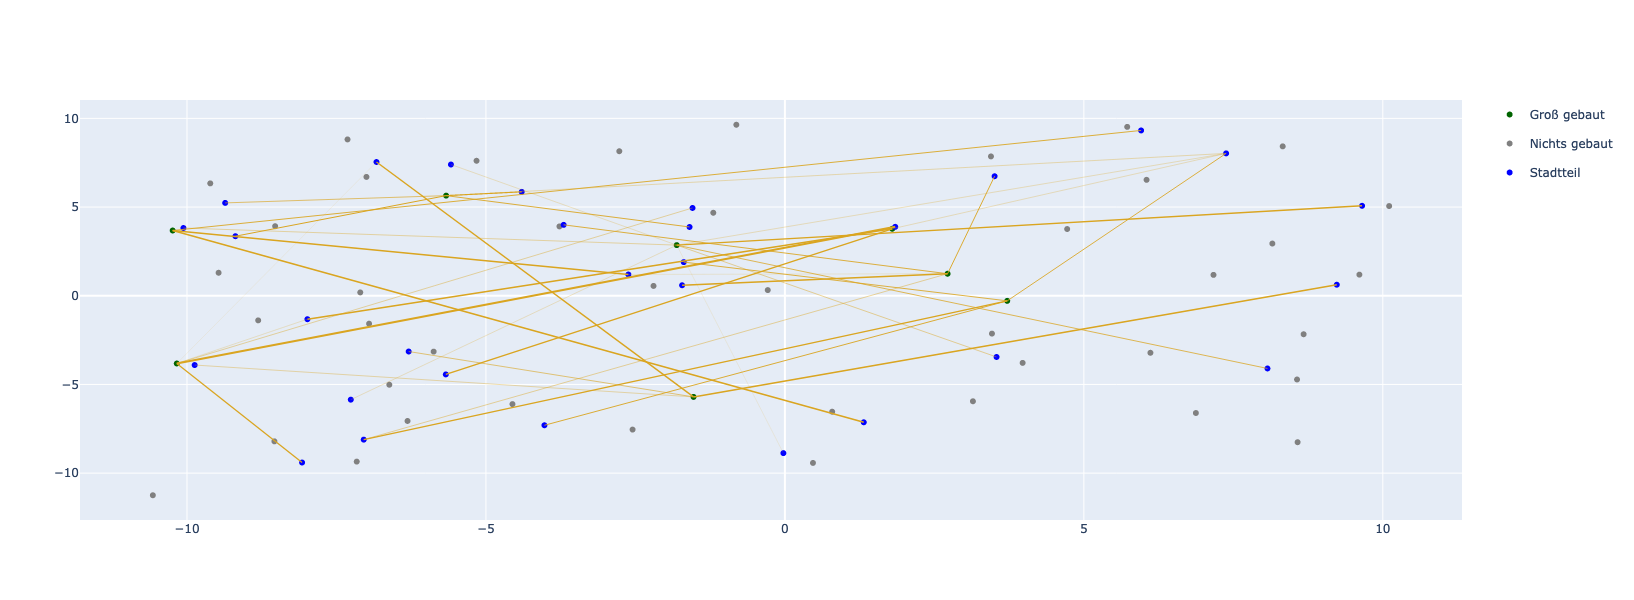



___Optimal costs___
The total cost of building [8] charging stations is $1,600,000.
The total cost of building [] small charging stations is $0.
The total cost of building [] medium-size charging stations is $0.
The total cost of building [8] large charging stations is $1,600,000.


In [88]:
# solve task 1
solve_location()

### Task 2

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1630 rows, 1650 columns and 4800 nonzeros
Model fingerprint: 0x6e874236
Variable types: 1500 continuous, 150 integer (150 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e+05, 2e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 1611 rows and 1620 columns
Presolve time: 0.01s
Presolved: 19 rows, 30 columns, 60 nonzeros
Variable types: 12 continuous, 18 integer (18 binary)
Found heuristic solution: objective 3160000.0000

Root relaxation: objective 2.858388e+06, 10 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 2858387.66    0    2 3160000.00 2858387.66  9.54%     -    0s
H    0     0             

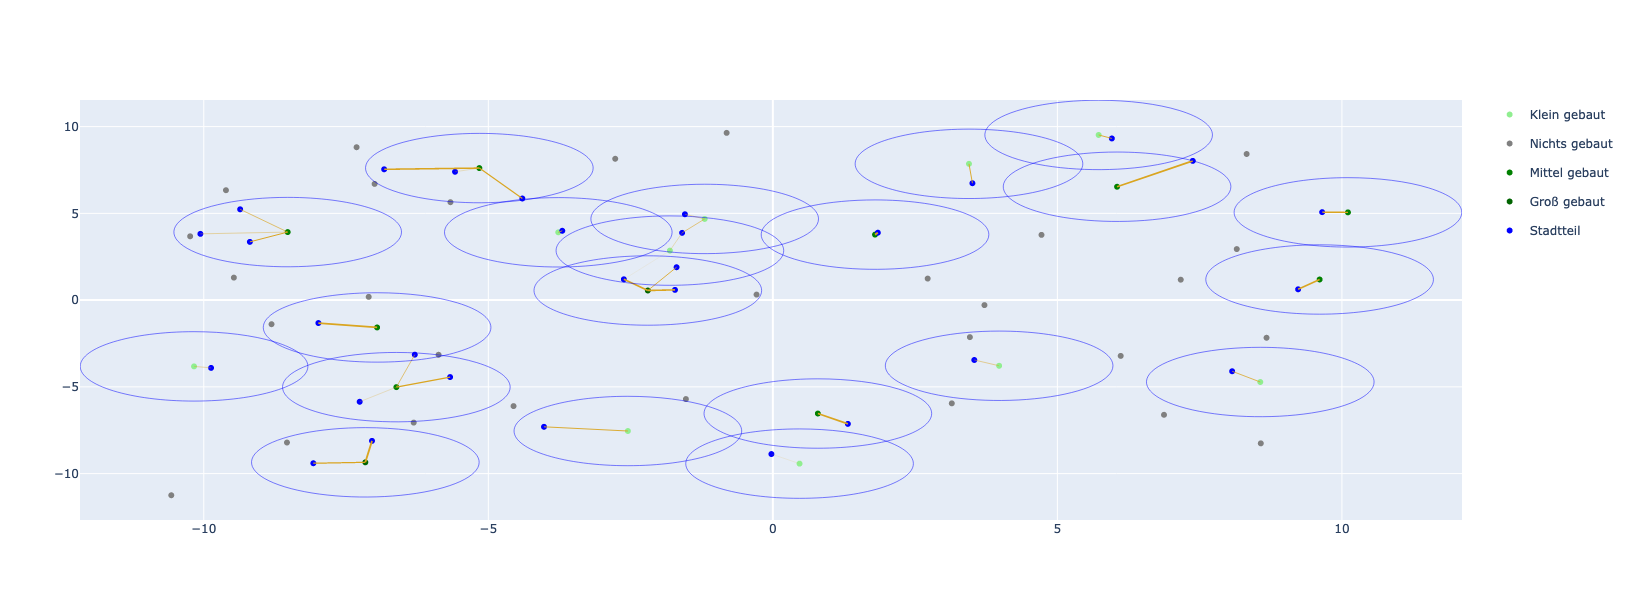



___Optimal costs___
The total cost of building [21] charging stations is $2,930,000.
The total cost of building [10] small charging stations is $1,000,000.
The total cost of building [9] medium-size charging stations is $1,530,000.
The total cost of building [2] large charging stations is $400,000.


In [89]:
# solve task 2
solve_location(radius=2)

### Task 3

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1631 rows, 1650 columns and 4950 nonzeros
Model fingerprint: 0x37a45229
Variable types: 1500 continuous, 150 integer (150 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+06]
Found heuristic solution: objective 311.4900000
Presolve removed 1558 rows and 1538 columns
Presolve time: 0.00s
Presolved: 73 rows, 112 columns, 265 nonzeros
Variable types: 46 continuous, 66 integer (63 binary)
Found heuristic solution: objective 271.6200000

Root relaxation: objective 6.446769e+01, 54 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   64.46769    0    5  271.62000   64.4

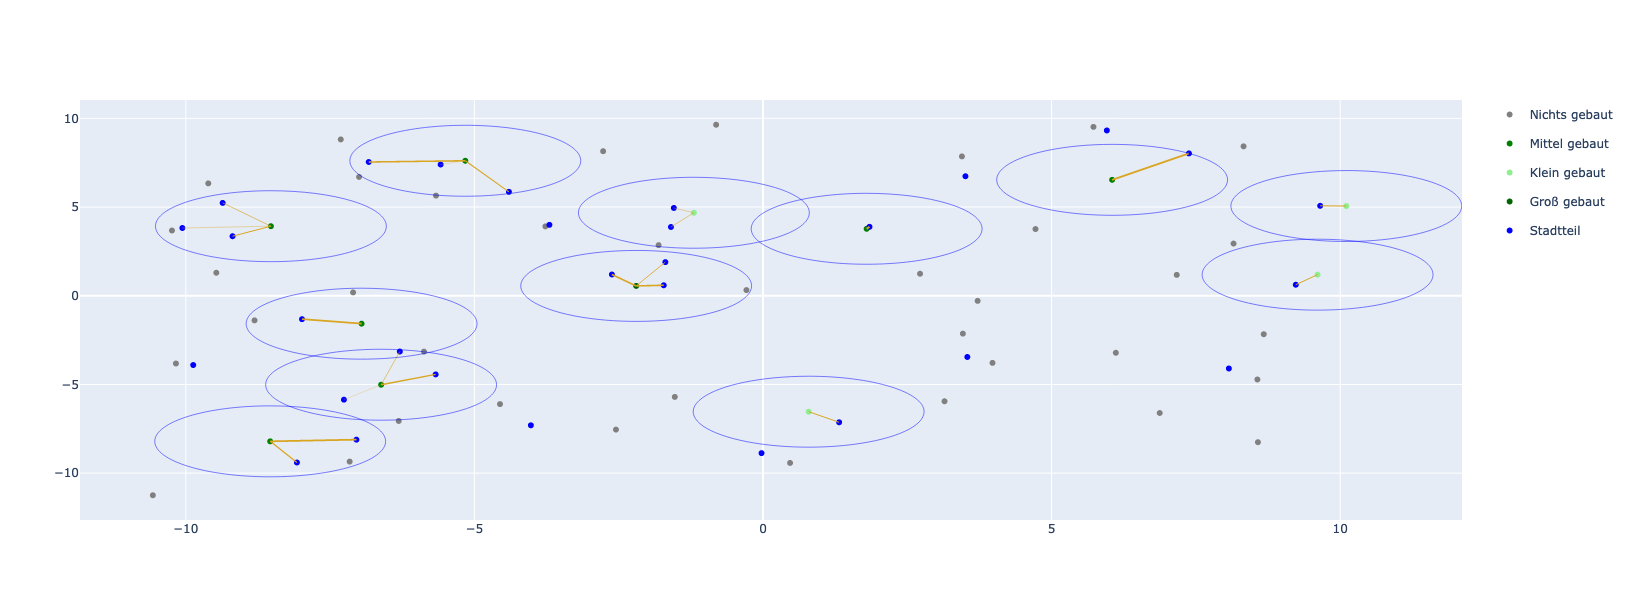



___Optimal costs___
The total cost of building [12] charging stations is $1,790,000.
The total cost of building [4] small charging stations is $400,000.
The total cost of building [7] medium-size charging stations is $1,190,000.
The total cost of building [1] large charging stations is $200,000.


In [90]:
# solve task 3
solve_location(radius=2, budget=1.8e6)